In [2]:
import numpy as np
from jPCA.util import plot_projections, preprocess
import jPCA

from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from utils.utils import (generate_response, compute_lambdas)
from utils.vis import peth_normalize
from utils.color_palettes import blue_yellow_cmap, journ_color_dict, RB1

import os
if not os.path.isdir('./figs'):
    os.mkdir('./figs')

# Notebook for plotting Figs 3, 5, S5, S6, S7

# Figure 3

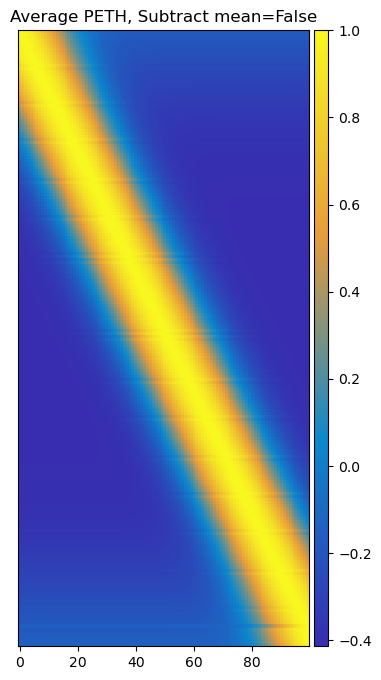

In [3]:
# figure 3A
c = generate_response(t_max=600, N=200, sigma=100, a=0, b=3.1, steps=100, 
                        phase_noise=0, amp_noise=0.0, amp_mean=1.0)[0].T 
times = np.arange(c.shape[0]).tolist()

subtract_mean=False


datas, data_list, _ = preprocess([c], times, 
                                tstart=times[0],
                                tend=times[-1],
                                soft_normalize=0,
                                subtract_cc_mean=subtract_mean, 
                                pca=False)
# sort by average wave maximum
cc_mean = np.mean(datas, axis=0)
idxs = np.argmax(cc_mean, axis=0)
cc_mean_sorted = cc_mean[:, np.argsort(idxs)]

fig, ax = plt.subplots(1, 1, figsize=(4, 8))
ax = [ax]
divider = make_axes_locatable(ax[-1])

# avg condition
mean_data_sort_norm = peth_normalize(cc_mean_sorted)
im1 = ax[0].imshow(mean_data_sort_norm.T, aspect='auto',
                cmap=blue_yellow_cmap(), interpolation='none')
ax[0].set_title('Average PETH, Subtract mean={}'.format(subtract_mean))
cax1 = divider.append_axes('right', size='5%', pad=0.05)
ax[0].set_yticks([])
fig.colorbar(im1, cax=cax1, orientation='vertical')
plt.savefig('figs/3A.pdf', format='pdf', dpi=300)
plt.show()                

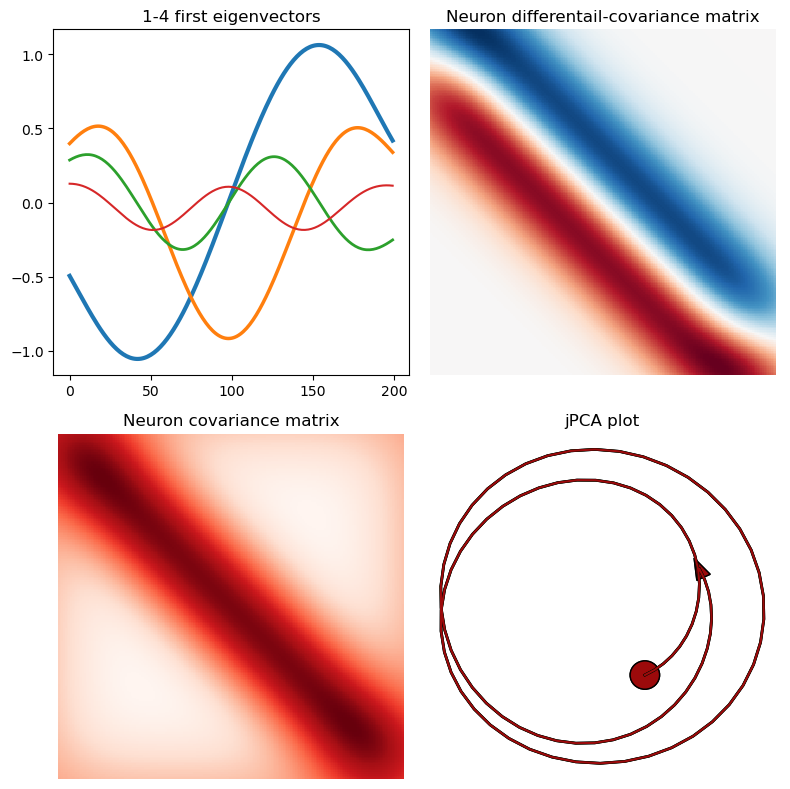

In [4]:
# figures 3B,C,D,E
cov = np.cov(c.T)
vals, eig = np.linalg.eig(cov)
vals = np.real(vals)
eig = np.real(eig)
jpca = jPCA.JPCA(num_jpcs=6)
(projected, full_data_var, pca_var_capt, jpca_var_capt) = jpca.fit([c, c], times=times, 
        tstart=times[0], tend=times[-1], subtract_cc_mean=False, num_pcs=6, pca=True,)

X = np.concatenate([x[:-1] for x in [c]])
X_dot = np.concatenate([np.diff(x, axis=0) for x in [c]])
dcov = X_dot.T @ X

fig, ax = plt.subplots(2, 2, figsize=(8, 8))
ax[1,0].axis('off')
ax[1,1].axis('off')
ax[0,1].axis('off')
ax[0,0].set_title('1-4 first eigenvectors', fontsize=12)
ax[1,0].set_title('Neuron covariance matrix', fontsize=12)
ax[0,1].set_title('Neuron differentail-covariance matrix', fontsize=12)
ax[1,1].set_title('jPCA plot', fontsize=12)
for i in range(4):
    ax[0,0].plot(eig[:, i]*vals[i], lw=3-i*0.5)
ax[1,0].imshow(cov, interpolation='none', cmap='Reds')
ax[0,1].imshow(dcov, interpolation='none', cmap='RdBu_r')
plot_projections(projected, x_idx=0, y_idx=1, circle_size=0.02, arrow_size=0.02, axis=ax[1,1])

plt.tight_layout()
plt.savefig('figs/3BCDE.pdf', format='pdf', dpi=300)
plt.show()

# Figure 5

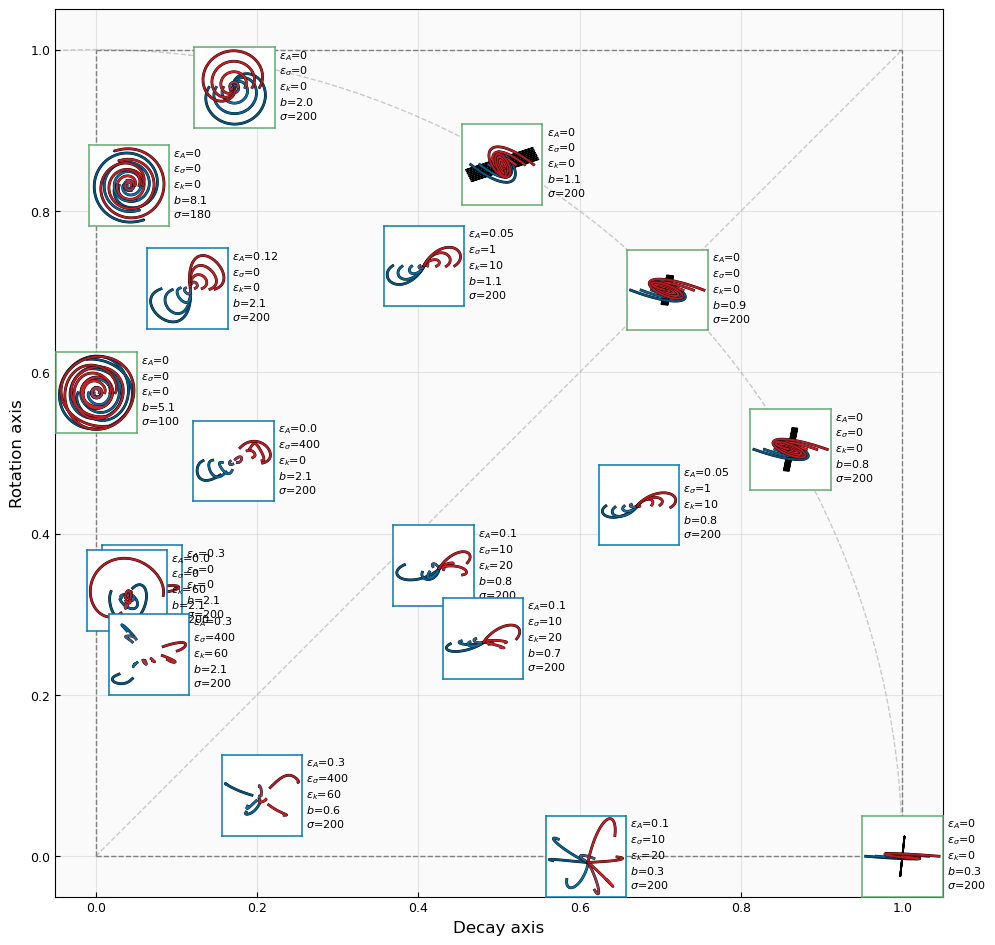

In [12]:
# Fig 5 gyration plane
# Note: random seed is not fixed. your realization may differ from that in the article

### in one plot
#representative params
params = [
        #noise free
        {'amp_noise':0, 'phase_noise':0, 'sigma_noise':0, 'sigma':100, 'ncond':8, 'wave_speed':5.1, 'color':journ_color_dict['green']},
        {'amp_noise':0, 'phase_noise':0, 'sigma_noise':0, 'sigma':180, 'ncond':8, 'wave_speed':8.1, 'color':journ_color_dict['green']},
        {'amp_noise':0, 'phase_noise':0, 'sigma_noise':0, 'sigma':200, 'ncond':8, 'wave_speed':2.0, 'color':journ_color_dict['green']},
        {'amp_noise':0, 'phase_noise':0, 'sigma_noise':0, 'sigma':200, 'ncond':8, 'wave_speed':1.1, 'color':journ_color_dict['green']},
        {'amp_noise':0, 'phase_noise':0, 'sigma_noise':0, 'sigma':200, 'ncond':8, 'wave_speed':0.9, 'color':journ_color_dict['green']},
        {'amp_noise':0, 'phase_noise':0, 'sigma_noise':0, 'sigma':200, 'ncond':8, 'wave_speed':0.8, 'color':journ_color_dict['green']},
        {'amp_noise':0, 'phase_noise':0, 'sigma_noise':0, 'sigma':200, 'ncond':8, 'wave_speed':0.3, 'color':journ_color_dict['green']},
        #noised
        {'amp_noise':0.12, 'phase_noise':0, 'sigma_noise':0, 'sigma':200, 'ncond':8, 'wave_speed':2.1, 'color':journ_color_dict['blue']},
        {'amp_noise':0., 'phase_noise':0, 'sigma_noise':400, 'sigma':200, 'ncond':8, 'wave_speed':2.1, 'color':journ_color_dict['blue']},  
        {'amp_noise':0.3, 'phase_noise':0, 'sigma_noise':0, 'sigma':200, 'ncond':8, 'wave_speed':2.1, 'color':journ_color_dict['blue']},
        {'amp_noise':0., 'phase_noise':60, 'sigma_noise':0, 'sigma':200, 'ncond':8, 'wave_speed':2.1, 'color':journ_color_dict['blue']},
        {'amp_noise':0.3, 'phase_noise':60, 'sigma_noise':400, 'sigma':200, 'ncond':8, 'wave_speed':2.1, 'color':journ_color_dict['blue']},
        {'amp_noise':0.3, 'phase_noise':60, 'sigma_noise':400, 'sigma':200, 'ncond':8, 'wave_speed':0.6, 'color':journ_color_dict['blue']},
        {'amp_noise':0.05, 'phase_noise':10, 'sigma_noise':1, 'sigma':200, 'ncond':8, 'wave_speed':1.1, 'color':journ_color_dict['blue']},
        {'amp_noise':0.05, 'phase_noise':10, 'sigma_noise':1, 'sigma':200, 'ncond':8, 'wave_speed':0.8, 'color':journ_color_dict['blue']},
        {'amp_noise':0.1, 'phase_noise':20, 'sigma_noise':10, 'sigma':200, 'ncond':8, 'wave_speed':0.8, 'color':journ_color_dict['blue']},
        {'amp_noise':0.1, 'phase_noise':20, 'sigma_noise':10, 'sigma':200, 'ncond':8, 'wave_speed':0.7, 'color':journ_color_dict['blue']},
        {'amp_noise':0.1, 'phase_noise':20, 'sigma_noise':10, 'sigma':200, 'ncond':8, 'wave_speed':0.3, 'color':journ_color_dict['blue']},
          ]

ins_size = 0.1
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.set_xlim([-0.05, 1.05])
ax.set_ylim([-0.05, 1.05])
ax.plot([0,0], [0,1], lw=1, ls='--', color='grey')
ax.plot([0,1], [0,0], lw=1, ls='--', color='grey')
ax.plot([0,1], [1,1], lw=1, ls='--', color='grey')
ax.plot([1,1], [0,1], lw=1, ls='--', color='grey')

ax.set_aspect('equal', adjustable='box')

ax.plot([0,1], [0,1], lw=1, ls='--', color='grey', alpha=0.4)
circle2 = plt.Circle((0, 0), 1, color='grey',lw=1, ls='--', fill=False, alpha=0.4)
ax.add_patch(circle2)

ax.grid(alpha=0.3)
ax.set_ylabel('Rotation axis', fontsize=12)
ax.set_xlabel('Decay axis', fontsize=12)
ax.set_facecolor('#fafafa')
ax.tick_params(axis='both', which='major', labelsize=9, direction="in")

for p in params:
        datas_list = [generate_response(t_max=600, N=200, 
                                sigma=p['sigma'], 
                                a=2, b=p['wave_speed'], steps=200, 
                                amp_mean=ampi,
                                sigma_noise=p['sigma_noise'],
                                phase_noise=p['phase_noise'],
                                amp_noise=p['amp_noise']
                                )[0].T 
                                for ampi in np.linspace(0.5, 1.0, p['ncond'])]
        
        times = np.arange(datas_list[0].shape[0]).tolist()
        start, end = times[0], times[-1]
        datas, data_list, full_data_var, pca_variance_captured, pca = preprocess(
                                                                datas_list, 
                                                                times=times, 
                                                                tstart=start,
                                                                tend=end,
                                                                soft_normalize=5, 
                                                                subtract_cc_mean=True, 
                                                                pca=False,
                                                                extra=True)
        
        #subsample neurons
        #datas = datas[:, :, ::20]

        # fit jPCA
        jpca = jPCA.JPCA(num_jpcs=6)
        (projected, _, _, _) = jpca.fit(datas_list, times=times, 
                tstart=start, tend=end, subtract_cc_mean=True, num_pcs=6, pca=True)

        # lambda computing
        Xeig = compute_lambdas(datas)
        xnom = np.abs(np.real(Xeig[0])) + np.abs(np.real(Xeig[1]))
        ynom = np.abs(np.imag(Xeig[0])) + np.abs(np.imag(Xeig[1]))
        x = xnom / (np.abs(Xeig).sum())
        y = ynom / (np.abs(Xeig).sum())

        ins = ax.inset_axes([x - ins_size/2, y - ins_size/2, ins_size, ins_size], transform=ax.transData)
        ins.set_aspect('equal', adjustable='datalim')
        plot_projections(projected, axis=ins, x_idx=0, y_idx=1, circle_size=0.000, arrow_size=0.000,
                        colormap=RB1()) 

        ins.set_title(  r'$\epsilon_{A}$='+f'{p["amp_noise"]} \n' + 
                        r'$\epsilon_{\sigma}$='+f'{p["sigma_noise"]} \n' + 
                        r'$\epsilon_{k}$='+f'{p["phase_noise"]} \n' + 
                        r'$b$='+f'{p["wave_speed"]} \n' + 
                        r'$\sigma$='+f'{p["sigma"]}', 
                        fontsize=8, x=1.05, y=0.0, ha='left')
        ins.set_xticks([])
        ins.set_yticks([])
        # Set the borders to a given color...
        for spine in ins.spines.values():
                spine.set_edgecolor(p['color'])
                spine.set_linewidth(1.1)
nam = 'figs/Fig5_gyration_plane_basic.pdf'
plt.savefig(nam, dpi=300, format='pdf', bbox_inches='tight', pad_inches=0.0)
plt.tight_layout()
plt.show()

# Figure S5

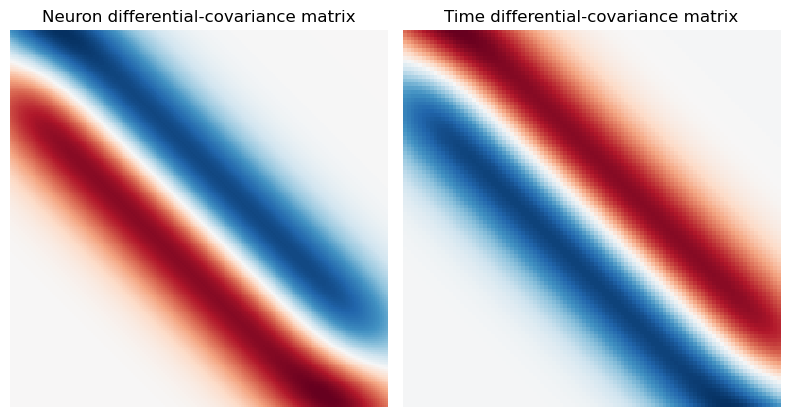

In [20]:
#supplementary S5

#generate a new running wave as on figure 3A (see above)
c = generate_response(t_max=600, N=200, sigma=100, a=0, b=3.1, steps=100, 
                        phase_noise=0, amp_noise=0.0, amp_mean=1.0)[0].T 

X = np.concatenate([x[:-1] for x in [c]])
X_dot = np.concatenate([np.diff(x, axis=0) for x in [c]])
dcov_N = X_dot.T @ X
dcov_T = X_dot @ X.T

fig, ax = plt.subplots(1, 2, figsize=(8, 10))
ax[0].axis('off')
ax[1].axis('off')
ax[0].set_title('Neuron differential-covariance matrix', fontsize=12)
ax[1].set_title('Time differential-covariance matrix', fontsize=12)
ax[0].imshow(dcov_N, interpolation='none', cmap='RdBu_r')
ax[1].imshow(dcov_T, interpolation='none', cmap='RdBu_r')

plt.tight_layout()
plt.savefig('figs/panelS5.pdf', format='pdf', dpi=300)
plt.show()

# Figure S6

/tmp/ipykernel_86962/2882289429.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(np.arange(n_num + 1, 0, -1))
/tmp/ipykernel_86962/2882289429.py:96: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


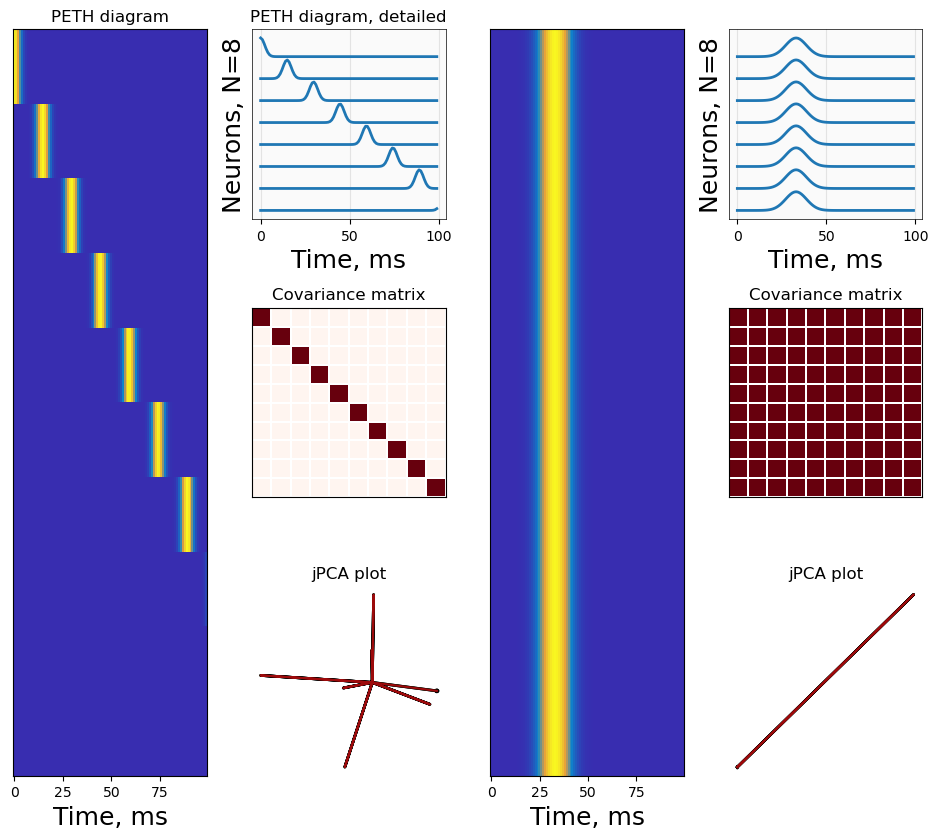

In [24]:
#supplementary S6
###  DATA ###
c1 = generate_response(t_max=600, N=10, sigma=20, a=0, b=90.1, steps=100, 
                        phase_noise=0, amp_noise=0.0, amp_mean=1.0)[0].T 
c2 = generate_response(t_max=600, N=10, sigma=50, a=200, b=0.0, steps=100, 
                        phase_noise=0, amp_noise=0.0, amp_mean=1.0)[0].T 
times = np.arange(c1.shape[0]).tolist()
subtract_mean=False

### cond1
datacov1 = np.eye(c1.shape[1])
jpca = jPCA.JPCA(num_jpcs=6)
(projected1, full_data_var, pca_var_capt, jpca_var_capt) = jpca.fit([c1, c1], times=times, 
        tstart=times[0], tend=times[-1], subtract_cc_mean=False, num_pcs=6, pca=True,)

#cond 2
datacov2 = np.ones((c1.shape[1], c1.shape[1]))
(projected2, full_data_var, pca_var_capt, jpca_var_capt) = jpca.fit([c2, c2], times=times, 
        tstart=times[0], tend=times[-1], subtract_cc_mean=False, num_pcs=6, pca=True,)

### PLOT ###
def plot_neurons(data, t, n_num, ax, condition_n=0,):
    if data.ndim == 3:
        data = data[condition_n]
        
    seq = np.arange(n_num, 0, -1)
    ax.set_yticklabels(np.arange(n_num + 1, 0, -1)) 
    for n in range(n_num):
        ax.plot(t, data[n]*0.85 + seq[n], linewidth=2.0, c='C0')
    ax.grid(alpha=0.3) #alpha=0.3
    
    for axis in ['top', 'bottom', 'left', 'right']:
        ax.spines[axis].set_linewidth(0.5)
    ax.set_facecolor('#fafafa')

from utils.color_palettes import blue_yellow_cmap
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
fig = plt.figure(layout="constrained", figsize=(9.5,8.5))
gs = GridSpec(3, 4, figure=fig)
wave1 = fig.add_subplot(gs[0, 1])
wave2 = fig.add_subplot(gs[0, 3], sharex=wave1)
peth1 = fig.add_subplot(gs[0:3, 0])
peth2 = fig.add_subplot(gs[0:3, 2])
cov1 = fig.add_subplot(gs[1, 1])
cov2 = fig.add_subplot(gs[1, 3])
jpca1 = fig.add_subplot(gs[2, 1])
jpca2 = fig.add_subplot(gs[2, 3])
# wave1.axis('off')
# wave2.axis('off')
#cov1.axis('off')
#cov2.axis('off')
jpca1.axis('off')
jpca2.axis('off')


plot_neurons(c1.T, times, 8, wave1)
plot_neurons(c2.T, times, 8, wave2)
wave1.set_ylabel('Neurons, N={}'.format(8), fontsize=18)
wave1.set_title('PETH diagram, detailed')
wave2.set_ylabel('Neurons, N={}'.format(8), fontsize=18)
wave1.set_yticks([])
wave2.set_yticks([])
wave1.set_xlabel('Time, ms', fontsize=18)
wave2.set_xlabel('Time, ms', fontsize=18)
wave2.locator_params(axis='x', nbins=4)

peth1.imshow(c1.T, aspect='auto',
                   cmap=blue_yellow_cmap(), interpolation='none')
#peth1.set_xticks([])
peth1.set_yticks([])
peth1.set_title('PETH diagram')
peth2.imshow(c2.T, aspect='auto',
                   cmap=blue_yellow_cmap(), interpolation='none')
peth2.set_yticks([])
peth1.set_xlabel('Time, ms', fontsize=18)
peth2.set_xlabel('Time, ms', fontsize=18)

cov1.pcolormesh(datacov1, edgecolors='w', linewidth=1.2, cmap='Reds', vmin=0, vmax=1)
cov2.pcolormesh(datacov2, edgecolors='w', linewidth=1.2, cmap='Reds', vmin=0, vmax=1)
cov1.set_title('Covariance matrix')
cov2.set_title('Covariance matrix')
cov1.invert_yaxis()
cov2.invert_yaxis()
cov1.set_xticks([])
cov1.set_yticks([])
cov2.set_xticks([])
cov2.set_yticks([])


plot_projections(projected1, x_idx=0, y_idx=1, circle_size=0.002, arrow_size=0.002, axis=jpca1)
plot_projections(projected2, x_idx=0, y_idx=1, circle_size=0.002, arrow_size=0.002, axis=jpca2)
jpca1.set_title('jPCA plot')
jpca2.set_title('jPCA plot')

plt.tight_layout()
plt.savefig('figs/panelS6.pdf', format='pdf', dpi=300)
plt.show()

# Figure S7

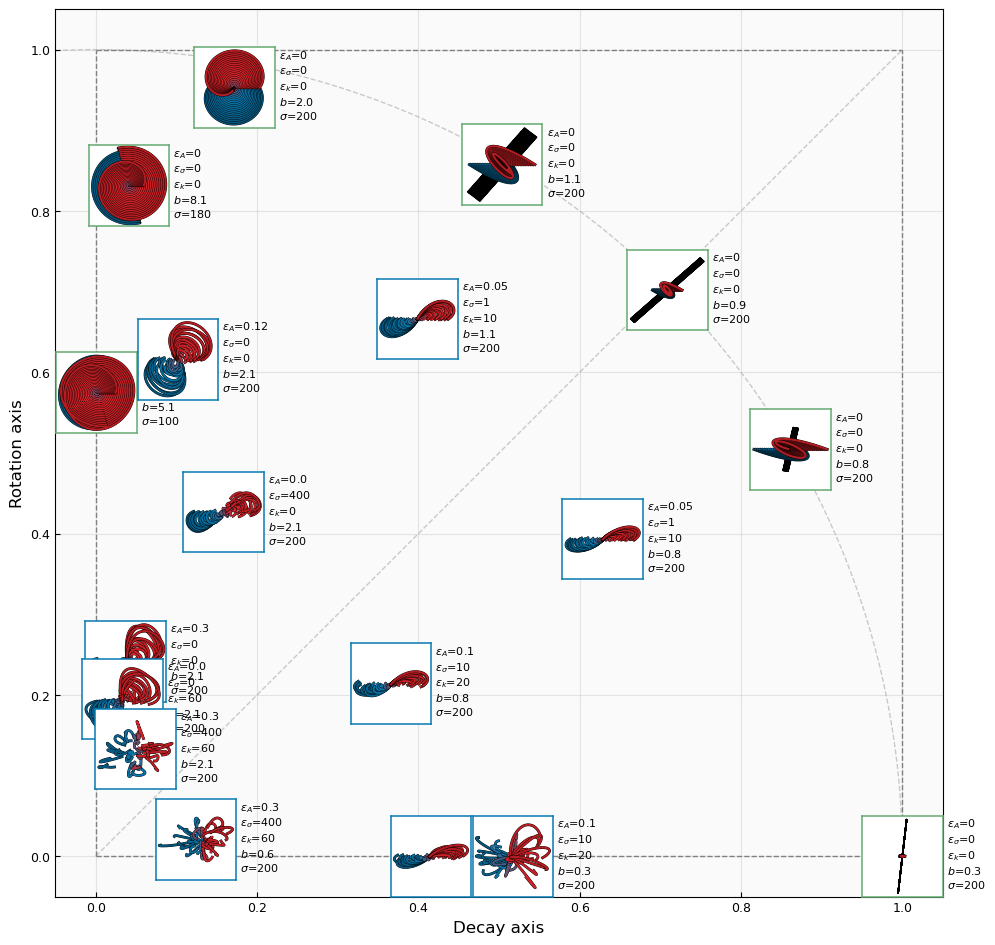

In [25]:
# S7A - gyration plane for the case of 40 conditions in each dataset

#representative params
params = [
        #noise free
        {'amp_noise':0, 'phase_noise':0, 'sigma_noise':0, 'sigma':100, 'ncond':40, 'wave_speed':5.1, 'color':journ_color_dict['green']},
        {'amp_noise':0, 'phase_noise':0, 'sigma_noise':0, 'sigma':180, 'ncond':40, 'wave_speed':8.1, 'color':journ_color_dict['green']},
        {'amp_noise':0, 'phase_noise':0, 'sigma_noise':0, 'sigma':200, 'ncond':40, 'wave_speed':2.0, 'color':journ_color_dict['green']},
        {'amp_noise':0, 'phase_noise':0, 'sigma_noise':0, 'sigma':200, 'ncond':40, 'wave_speed':1.1, 'color':journ_color_dict['green']},
        {'amp_noise':0, 'phase_noise':0, 'sigma_noise':0, 'sigma':200, 'ncond':40, 'wave_speed':0.9, 'color':journ_color_dict['green']},
        {'amp_noise':0, 'phase_noise':0, 'sigma_noise':0, 'sigma':200, 'ncond':40, 'wave_speed':0.8, 'color':journ_color_dict['green']},
        {'amp_noise':0, 'phase_noise':0, 'sigma_noise':0, 'sigma':200, 'ncond':40, 'wave_speed':0.3, 'color':journ_color_dict['green']},
        #noised
        {'amp_noise':0.12, 'phase_noise':0, 'sigma_noise':0, 'sigma':200, 'ncond':40, 'wave_speed':2.1, 'color':journ_color_dict['blue']},
        {'amp_noise':0., 'phase_noise':0, 'sigma_noise':400, 'sigma':200, 'ncond':40, 'wave_speed':2.1, 'color':journ_color_dict['blue']},  
        {'amp_noise':0.3, 'phase_noise':0, 'sigma_noise':0, 'sigma':200, 'ncond':40, 'wave_speed':2.1, 'color':journ_color_dict['blue']},
        {'amp_noise':0., 'phase_noise':60, 'sigma_noise':0, 'sigma':200, 'ncond':40, 'wave_speed':2.1, 'color':journ_color_dict['blue']},
        {'amp_noise':0.3, 'phase_noise':60, 'sigma_noise':400, 'sigma':200, 'ncond':40, 'wave_speed':2.1, 'color':journ_color_dict['blue']},
        {'amp_noise':0.3, 'phase_noise':60, 'sigma_noise':400, 'sigma':200, 'ncond':40, 'wave_speed':0.6, 'color':journ_color_dict['blue']},
        {'amp_noise':0.05, 'phase_noise':10, 'sigma_noise':1, 'sigma':200, 'ncond':40, 'wave_speed':1.1, 'color':journ_color_dict['blue']},
        {'amp_noise':0.05, 'phase_noise':10, 'sigma_noise':1, 'sigma':200, 'ncond':40, 'wave_speed':0.8, 'color':journ_color_dict['blue']},
        {'amp_noise':0.1, 'phase_noise':20, 'sigma_noise':10, 'sigma':200, 'ncond':40, 'wave_speed':0.8, 'color':journ_color_dict['blue']},
        {'amp_noise':0.1, 'phase_noise':20, 'sigma_noise':10, 'sigma':200, 'ncond':40, 'wave_speed':0.7, 'color':journ_color_dict['blue']},
        {'amp_noise':0.1, 'phase_noise':20, 'sigma_noise':10, 'sigma':200, 'ncond':40, 'wave_speed':0.3, 'color':journ_color_dict['blue']},
          ]

ins_size = 0.1
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.set_xlim([-0.05, 1.05])
ax.set_ylim([-0.05, 1.05])
ax.plot([0,0], [0,1], lw=1, ls='--', color='grey')
ax.plot([0,1], [0,0], lw=1, ls='--', color='grey')
ax.plot([0,1], [1,1], lw=1, ls='--', color='grey')
ax.plot([1,1], [0,1], lw=1, ls='--', color='grey')

ax.set_aspect('equal', adjustable='box')

ax.plot([0,1], [0,1], lw=1, ls='--', color='grey', alpha=0.4)
circle2 = plt.Circle((0, 0), 1, color='grey',lw=1, ls='--', fill=False, alpha=0.4)
ax.add_patch(circle2)

ax.grid(alpha=0.3)
ax.set_ylabel('Rotation axis', fontsize=12)
ax.set_xlabel('Decay axis', fontsize=12)
ax.set_facecolor('#fafafa')
ax.tick_params(axis='both', which='major', labelsize=9, direction="in")

for p in params:
        datas_list = [generate_response(t_max=600, N=200, 
                                sigma=p['sigma'], 
                                a=2, b=p['wave_speed'], steps=200, 
                                amp_mean=ampi,
                                sigma_noise=p['sigma_noise'],
                                phase_noise=p['phase_noise'],
                                amp_noise=p['amp_noise']
                                )[0].T 
                                for ampi in np.linspace(0.5, 1.0, p['ncond'])]
        
        times = np.arange(datas_list[0].shape[0]).tolist()
        start, end = times[0], times[-1]
        datas, data_list, full_data_var, pca_variance_captured, pca = preprocess(
                                                                datas_list, 
                                                                times=times, 
                                                                tstart=start,
                                                                tend=end,
                                                                soft_normalize=5, 
                                                                subtract_cc_mean=True, 
                                                                pca=False,
                                                                extra=True)
        
        # fit jPCA
        jpca = jPCA.JPCA(num_jpcs=6)
        (projected, _, _, _) = jpca.fit(datas_list, times=times, 
                tstart=start, tend=end, subtract_cc_mean=True, num_pcs=6, pca=True)

        # lambda computing
        Xeig = compute_lambdas(datas)
        xnom = np.abs(np.real(Xeig[0])) + np.abs(np.real(Xeig[1]))
        ynom = np.abs(np.imag(Xeig[0])) + np.abs(np.imag(Xeig[1]))
        x = xnom / (np.abs(Xeig).sum())
        y = ynom / (np.abs(Xeig).sum())

        ins = ax.inset_axes([x - ins_size/2, y - ins_size/2, ins_size, ins_size], transform=ax.transData)
        ins.set_aspect('equal', adjustable='datalim')
        plot_projections(projected, axis=ins, x_idx=0, y_idx=1, circle_size=0.000, arrow_size=0.000,
                        colormap=RB1()) 

        ins.set_title(  r'$\epsilon_{A}$='+f'{p["amp_noise"]} \n' + 
                        r'$\epsilon_{\sigma}$='+f'{p["sigma_noise"]} \n' + 
                        r'$\epsilon_{k}$='+f'{p["phase_noise"]} \n' + 
                        r'$b$='+f'{p["wave_speed"]} \n' + 
                        r'$\sigma$='+f'{p["sigma"]}', 
                        fontsize=8, x=1.05, y=0.0, ha='left')
        ins.set_xticks([])
        ins.set_yticks([])
        # Set the borders to a given color...
        for spine in ins.spines.values():
                spine.set_edgecolor(p['color'])
                spine.set_linewidth(1.1)
nam = 'figs/S7A_40_datasets.pdf'
plt.savefig(nam, dpi=300, format='pdf', bbox_inches='tight', pad_inches=0.0)
plt.tight_layout()
plt.show()

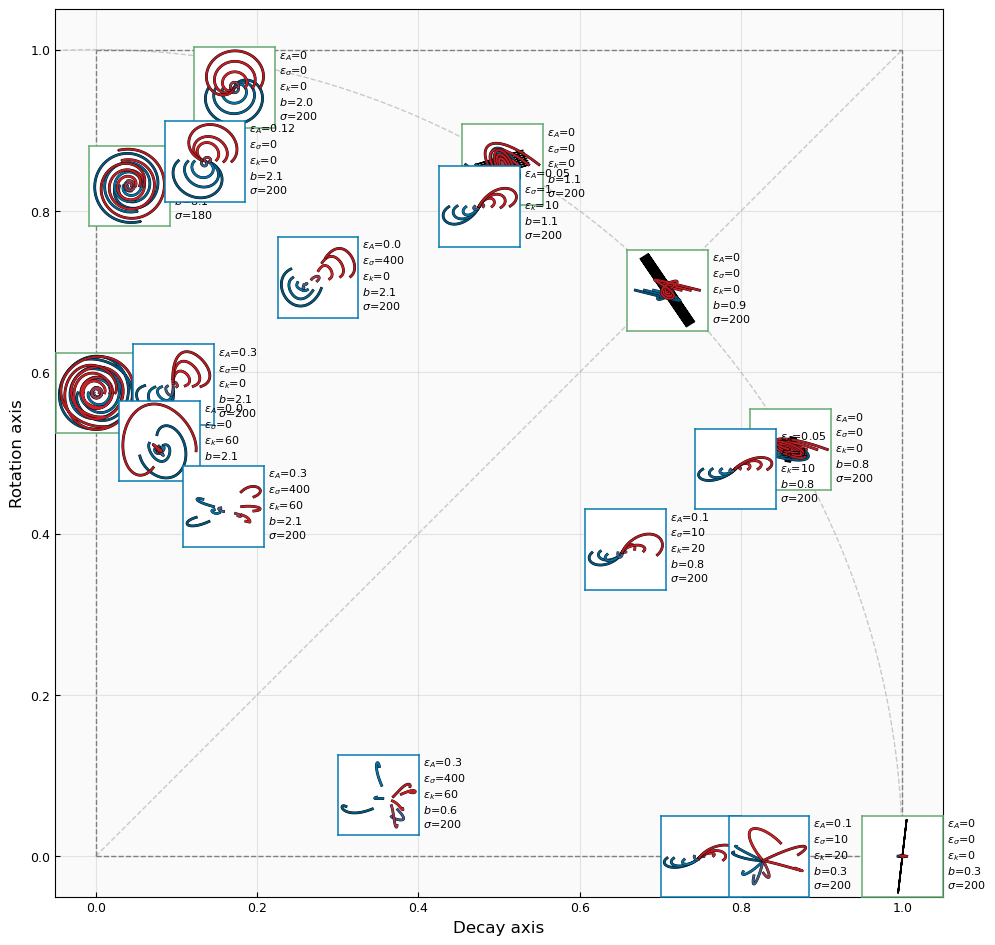

In [28]:
# S7B - gyration plane for the increased range of wave amplitudes (do not confuse with amp_noise)
# base gyration plane

#representative params
params = [
        #noise free
        {'amp_noise':0, 'phase_noise':0, 'sigma_noise':0, 'sigma':100, 'ncond':8, 'wave_speed':5.1, 'color':journ_color_dict['green']},
        {'amp_noise':0, 'phase_noise':0, 'sigma_noise':0, 'sigma':180, 'ncond':8, 'wave_speed':8.1, 'color':journ_color_dict['green']},
        {'amp_noise':0, 'phase_noise':0, 'sigma_noise':0, 'sigma':200, 'ncond':8, 'wave_speed':2.0, 'color':journ_color_dict['green']},
        {'amp_noise':0, 'phase_noise':0, 'sigma_noise':0, 'sigma':200, 'ncond':8, 'wave_speed':1.1, 'color':journ_color_dict['green']},
        {'amp_noise':0, 'phase_noise':0, 'sigma_noise':0, 'sigma':200, 'ncond':8, 'wave_speed':0.9, 'color':journ_color_dict['green']},
        {'amp_noise':0, 'phase_noise':0, 'sigma_noise':0, 'sigma':200, 'ncond':8, 'wave_speed':0.8, 'color':journ_color_dict['green']},
        {'amp_noise':0, 'phase_noise':0, 'sigma_noise':0, 'sigma':200, 'ncond':8, 'wave_speed':0.3, 'color':journ_color_dict['green']},
        #noised
        {'amp_noise':0.12, 'phase_noise':0, 'sigma_noise':0, 'sigma':200, 'ncond':8, 'wave_speed':2.1, 'color':journ_color_dict['blue']},
        {'amp_noise':0., 'phase_noise':0, 'sigma_noise':400, 'sigma':200, 'ncond':8, 'wave_speed':2.1, 'color':journ_color_dict['blue']},  
        {'amp_noise':0.3, 'phase_noise':0, 'sigma_noise':0, 'sigma':200, 'ncond':8, 'wave_speed':2.1, 'color':journ_color_dict['blue']},
        {'amp_noise':0., 'phase_noise':60, 'sigma_noise':0, 'sigma':200, 'ncond':8, 'wave_speed':2.1, 'color':journ_color_dict['blue']},
        {'amp_noise':0.3, 'phase_noise':60, 'sigma_noise':400, 'sigma':200, 'ncond':8, 'wave_speed':2.1, 'color':journ_color_dict['blue']},
        {'amp_noise':0.3, 'phase_noise':60, 'sigma_noise':400, 'sigma':200, 'ncond':8, 'wave_speed':0.6, 'color':journ_color_dict['blue']},
        {'amp_noise':0.05, 'phase_noise':10, 'sigma_noise':1, 'sigma':200, 'ncond':8, 'wave_speed':1.1, 'color':journ_color_dict['blue']},
        {'amp_noise':0.05, 'phase_noise':10, 'sigma_noise':1, 'sigma':200, 'ncond':8, 'wave_speed':0.8, 'color':journ_color_dict['blue']},
        {'amp_noise':0.1, 'phase_noise':20, 'sigma_noise':10, 'sigma':200, 'ncond':8, 'wave_speed':0.8, 'color':journ_color_dict['blue']},
        {'amp_noise':0.1, 'phase_noise':20, 'sigma_noise':10, 'sigma':200, 'ncond':8, 'wave_speed':0.7, 'color':journ_color_dict['blue']},
        {'amp_noise':0.1, 'phase_noise':20, 'sigma_noise':10, 'sigma':200, 'ncond':8, 'wave_speed':0.3, 'color':journ_color_dict['blue']},
          ]

ins_size = 0.1
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.set_xlim([-0.05, 1.05])
ax.set_ylim([-0.05, 1.05])
ax.plot([0,0], [0,1], lw=1, ls='--', color='grey')
ax.plot([0,1], [0,0], lw=1, ls='--', color='grey')
ax.plot([0,1], [1,1], lw=1, ls='--', color='grey')
ax.plot([1,1], [0,1], lw=1, ls='--', color='grey')

ax.set_aspect('equal', adjustable='box')

ax.plot([0,1], [0,1], lw=1, ls='--', color='grey', alpha=0.4)
circle2 = plt.Circle((0, 0), 1, color='grey',lw=1, ls='--', fill=False, alpha=0.4)
ax.add_patch(circle2)

ax.grid(alpha=0.3)
ax.set_ylabel('Rotation axis', fontsize=12)
ax.set_xlabel('Decay axis', fontsize=12)
ax.set_facecolor('#fafafa')
ax.tick_params(axis='both', which='major', labelsize=9, direction="in")

for p in params:
        datas_list = [generate_response(t_max=600, N=200, 
                                sigma=p['sigma'], 
                                a=2, b=p['wave_speed'], steps=200, 
                                amp_mean=ampi,
                                sigma_noise=p['sigma_noise'],
                                phase_noise=p['phase_noise'],
                                amp_noise=p['amp_noise']
                                )[0].T 
                                for ampi in np.linspace(0.3, 1.2, p['ncond'])] # <--- INCREASED RANGE OF AMPLITUDES
        
        times = np.arange(datas_list[0].shape[0]).tolist()
        start, end = times[0], times[-1]
        datas, data_list, full_data_var, pca_variance_captured, pca = preprocess(
                                                                datas_list, 
                                                                times=times, 
                                                                tstart=start,
                                                                tend=end,
                                                                soft_normalize=5, 
                                                                subtract_cc_mean=True, 
                                                                pca=False,
                                                                extra=True)

        # fit jPCA
        jpca = jPCA.JPCA(num_jpcs=6)
        (projected, _, _, _) = jpca.fit(datas_list, times=times, 
                tstart=start, tend=end, subtract_cc_mean=True, num_pcs=6, pca=True)

        # lambda computing
        Xeig = compute_lambdas(datas)
        xnom = np.abs(np.real(Xeig[0])) + np.abs(np.real(Xeig[1]))
        ynom = np.abs(np.imag(Xeig[0])) + np.abs(np.imag(Xeig[1]))
        x = xnom / (np.abs(Xeig).sum())
        y = ynom / (np.abs(Xeig).sum())

        ins = ax.inset_axes([x - ins_size/2, y - ins_size/2, ins_size, ins_size], transform=ax.transData)
        ins.set_aspect('equal', adjustable='datalim')
        plot_projections(projected, axis=ins, x_idx=0, y_idx=1, circle_size=0.000, arrow_size=0.000,
                        colormap=RB1()) 

        ins.set_title(  r'$\epsilon_{A}$='+f'{p["amp_noise"]} \n' + 
                        r'$\epsilon_{\sigma}$='+f'{p["sigma_noise"]} \n' + 
                        r'$\epsilon_{k}$='+f'{p["phase_noise"]} \n' + 
                        r'$b$='+f'{p["wave_speed"]} \n' + 
                        r'$\sigma$='+f'{p["sigma"]}', 
                        fontsize=8, x=1.05, y=0.0, ha='left')
        ins.set_xticks([])
        ins.set_yticks([])
        # Set the borders to a given color...
        for spine in ins.spines.values():
                spine.set_edgecolor(p['color'])
                spine.set_linewidth(1.1)
nam ='figs/S7B_amp_range_datasets.pdf'
plt.savefig(nam, dpi=300, format='pdf', bbox_inches='tight', pad_inches=0.0)
plt.tight_layout()
plt.show()

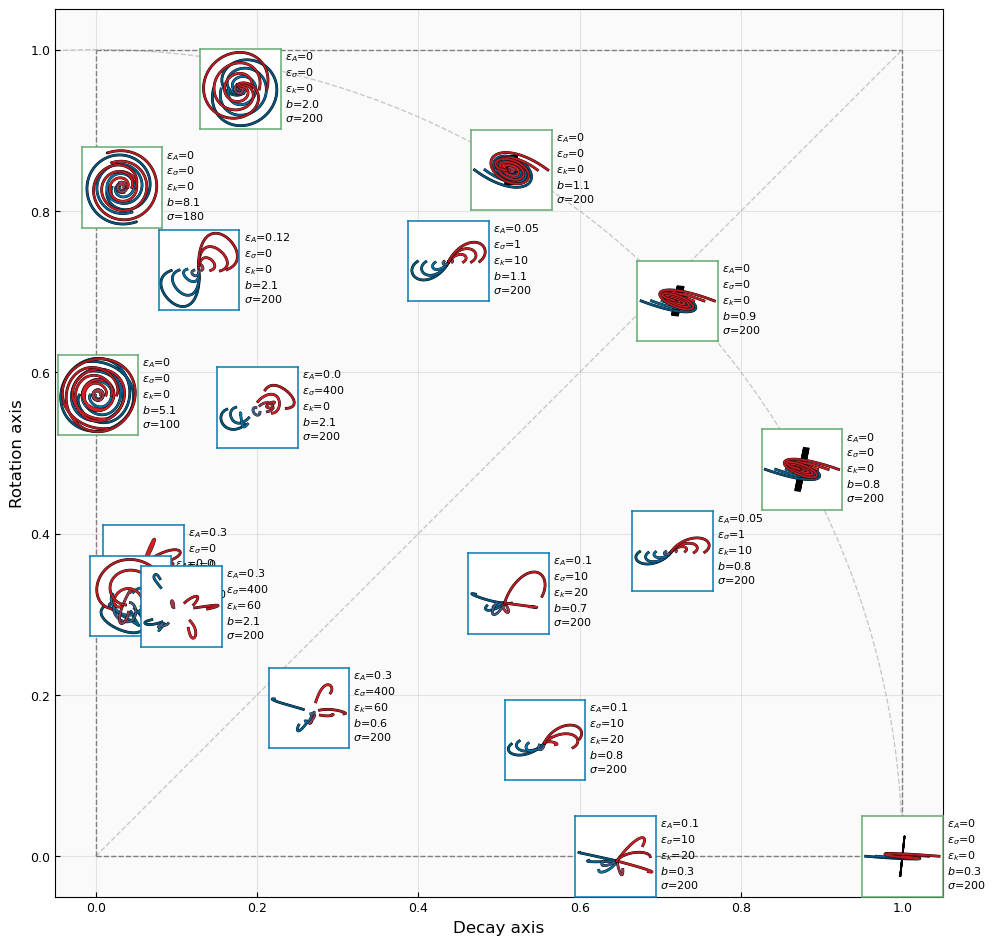

In [27]:
# S7C - gyration plane for the case of 20 neurons in each condition of each dataset

#representative params
params = [
        #noise free
        {'amp_noise':0, 'phase_noise':0, 'sigma_noise':0, 'sigma':100, 'ncond':8, 'wave_speed':5.1, 'color':journ_color_dict['green']},
        {'amp_noise':0, 'phase_noise':0, 'sigma_noise':0, 'sigma':180, 'ncond':8, 'wave_speed':8.1, 'color':journ_color_dict['green']},
        {'amp_noise':0, 'phase_noise':0, 'sigma_noise':0, 'sigma':200, 'ncond':8, 'wave_speed':2.0, 'color':journ_color_dict['green']},
        {'amp_noise':0, 'phase_noise':0, 'sigma_noise':0, 'sigma':200, 'ncond':8, 'wave_speed':1.1, 'color':journ_color_dict['green']},
        {'amp_noise':0, 'phase_noise':0, 'sigma_noise':0, 'sigma':200, 'ncond':8, 'wave_speed':0.9, 'color':journ_color_dict['green']},
        {'amp_noise':0, 'phase_noise':0, 'sigma_noise':0, 'sigma':200, 'ncond':8, 'wave_speed':0.8, 'color':journ_color_dict['green']},
        {'amp_noise':0, 'phase_noise':0, 'sigma_noise':0, 'sigma':200, 'ncond':8, 'wave_speed':0.3, 'color':journ_color_dict['green']},
        #noised
        {'amp_noise':0.12, 'phase_noise':0, 'sigma_noise':0, 'sigma':200, 'ncond':8, 'wave_speed':2.1, 'color':journ_color_dict['blue']},
        {'amp_noise':0., 'phase_noise':0, 'sigma_noise':400, 'sigma':200, 'ncond':8, 'wave_speed':2.1, 'color':journ_color_dict['blue']},  
        {'amp_noise':0.3, 'phase_noise':0, 'sigma_noise':0, 'sigma':200, 'ncond':8, 'wave_speed':2.1, 'color':journ_color_dict['blue']},
        {'amp_noise':0., 'phase_noise':60, 'sigma_noise':0, 'sigma':200, 'ncond':8, 'wave_speed':2.1, 'color':journ_color_dict['blue']},
        {'amp_noise':0.3, 'phase_noise':60, 'sigma_noise':400, 'sigma':200, 'ncond':8, 'wave_speed':2.1, 'color':journ_color_dict['blue']},
        {'amp_noise':0.3, 'phase_noise':60, 'sigma_noise':400, 'sigma':200, 'ncond':8, 'wave_speed':0.6, 'color':journ_color_dict['blue']},
        {'amp_noise':0.05, 'phase_noise':10, 'sigma_noise':1, 'sigma':200, 'ncond':8, 'wave_speed':1.1, 'color':journ_color_dict['blue']},
        {'amp_noise':0.05, 'phase_noise':10, 'sigma_noise':1, 'sigma':200, 'ncond':8, 'wave_speed':0.8, 'color':journ_color_dict['blue']},
        {'amp_noise':0.1, 'phase_noise':20, 'sigma_noise':10, 'sigma':200, 'ncond':8, 'wave_speed':0.8, 'color':journ_color_dict['blue']},
        {'amp_noise':0.1, 'phase_noise':20, 'sigma_noise':10, 'sigma':200, 'ncond':8, 'wave_speed':0.7, 'color':journ_color_dict['blue']},
        {'amp_noise':0.1, 'phase_noise':20, 'sigma_noise':10, 'sigma':200, 'ncond':8, 'wave_speed':0.3, 'color':journ_color_dict['blue']},
          ]

ins_size = 0.1
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.set_xlim([-0.05, 1.05])
ax.set_ylim([-0.05, 1.05])
ax.plot([0,0], [0,1], lw=1, ls='--', color='grey')
ax.plot([0,1], [0,0], lw=1, ls='--', color='grey')
ax.plot([0,1], [1,1], lw=1, ls='--', color='grey')
ax.plot([1,1], [0,1], lw=1, ls='--', color='grey')

ax.set_aspect('equal', adjustable='box')

ax.plot([0,1], [0,1], lw=1, ls='--', color='grey', alpha=0.4)
circle2 = plt.Circle((0, 0), 1, color='grey',lw=1, ls='--', fill=False, alpha=0.4)
ax.add_patch(circle2)

ax.grid(alpha=0.3)
ax.set_ylabel('Rotation axis', fontsize=12)
ax.set_xlabel('Decay axis', fontsize=12)
ax.set_facecolor('#fafafa')
ax.tick_params(axis='both', which='major', labelsize=9, direction="in")

for p in params:
        datas_list = [generate_response(t_max=600, N=200, 
                                sigma=p['sigma'], 
                                a=2, b=p['wave_speed'], steps=200, 
                                amp_mean=ampi,
                                sigma_noise=p['sigma_noise'],
                                phase_noise=p['phase_noise'],
                                amp_noise=p['amp_noise']
                                )[0].T 
                                for ampi in np.linspace(0.5, 1.0, p['ncond'])]
        
        times = np.arange(datas_list[0].shape[0]).tolist()
        start, end = times[0], times[-1]
        datas, data_list, full_data_var, pca_variance_captured, pca = preprocess(
                                                                datas_list, 
                                                                times=times, 
                                                                tstart=start,
                                                                tend=end,
                                                                soft_normalize=5, 
                                                                subtract_cc_mean=True, 
                                                                pca=False,
                                                                extra=True)
        
        #subsample neurons each 5 from 100 (20 in total)
        datas = datas[:, :, ::5]

        # fit jPCA
        jpca = jPCA.JPCA(num_jpcs=6)
        (projected, _, _, _) = jpca.fit(datas_list, times=times, 
                tstart=start, tend=end, subtract_cc_mean=True, num_pcs=6, pca=True)

        # lambda computing
        Xeig = compute_lambdas(datas)
        xnom = np.abs(np.real(Xeig[0])) + np.abs(np.real(Xeig[1]))
        ynom = np.abs(np.imag(Xeig[0])) + np.abs(np.imag(Xeig[1]))
        x = xnom / (np.abs(Xeig).sum())
        y = ynom / (np.abs(Xeig).sum())

        ins = ax.inset_axes([x - ins_size/2, y - ins_size/2, ins_size, ins_size], transform=ax.transData)
        ins.set_aspect('equal', adjustable='datalim')
        plot_projections(projected, axis=ins, x_idx=0, y_idx=1, circle_size=0.000, arrow_size=0.000,
                        colormap=RB1()) 

        ins.set_title(  r'$\epsilon_{A}$='+f'{p["amp_noise"]} \n' + 
                        r'$\epsilon_{\sigma}$='+f'{p["sigma_noise"]} \n' + 
                        r'$\epsilon_{k}$='+f'{p["phase_noise"]} \n' + 
                        r'$b$='+f'{p["wave_speed"]} \n' + 
                        r'$\sigma$='+f'{p["sigma"]}', 
                        fontsize=8, x=1.05, y=0.0, ha='left')
        ins.set_xticks([])
        ins.set_yticks([])
        # Set the borders to a given color...
        for spine in ins.spines.values():
                spine.set_edgecolor(p['color'])
                spine.set_linewidth(1.1)
nam = 'figs/S7C_20_neurons.pdf'
plt.savefig(nam, dpi=300, format='pdf', bbox_inches='tight', pad_inches=0.0)
plt.tight_layout()
plt.show()

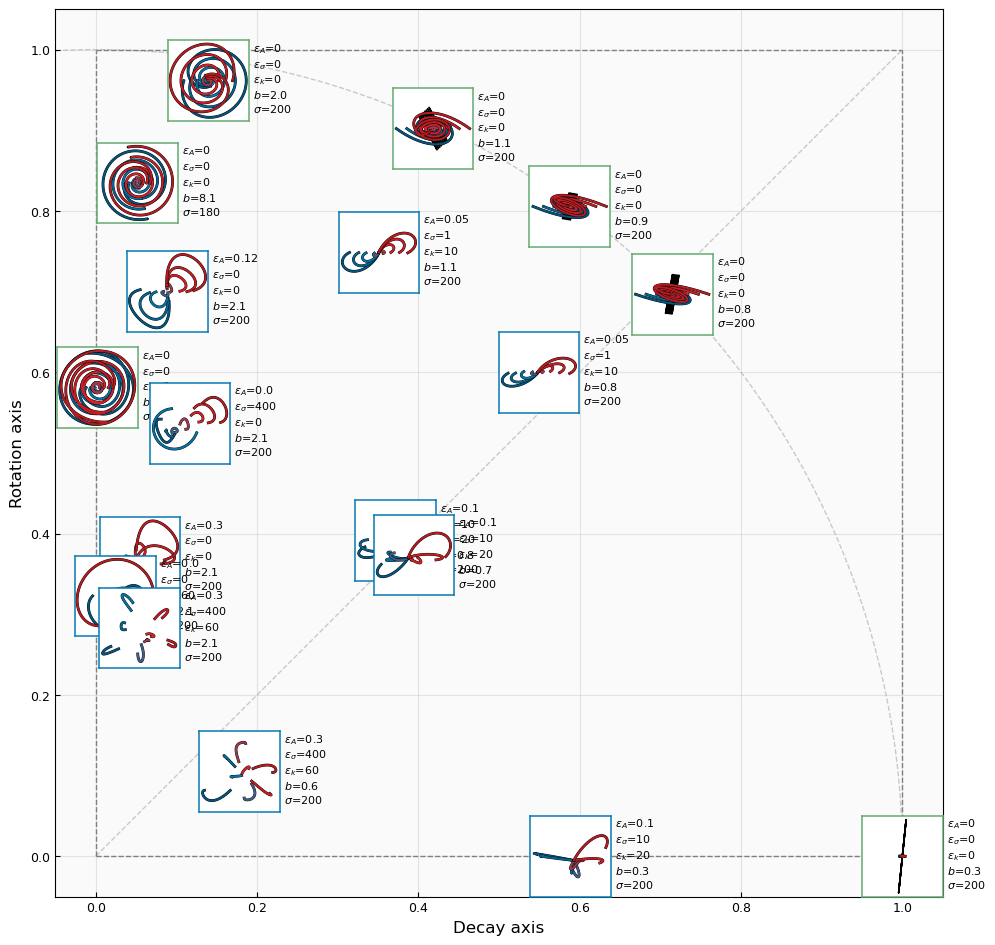

In [29]:
# S7D - gyration plane for the case of increased initial wave shift 

#representative params
params = [
        #noise free
        {'amp_noise':0, 'phase_noise':0, 'sigma_noise':0, 'sigma':100, 'ncond':8, 'wave_speed':5.1, 'color':journ_color_dict['green']},
        {'amp_noise':0, 'phase_noise':0, 'sigma_noise':0, 'sigma':180, 'ncond':8, 'wave_speed':8.1, 'color':journ_color_dict['green']},
        {'amp_noise':0, 'phase_noise':0, 'sigma_noise':0, 'sigma':200, 'ncond':8, 'wave_speed':2.0, 'color':journ_color_dict['green']},
        {'amp_noise':0, 'phase_noise':0, 'sigma_noise':0, 'sigma':200, 'ncond':8, 'wave_speed':1.1, 'color':journ_color_dict['green']},
        {'amp_noise':0, 'phase_noise':0, 'sigma_noise':0, 'sigma':200, 'ncond':8, 'wave_speed':0.9, 'color':journ_color_dict['green']},
        {'amp_noise':0, 'phase_noise':0, 'sigma_noise':0, 'sigma':200, 'ncond':8, 'wave_speed':0.8, 'color':journ_color_dict['green']},
        {'amp_noise':0, 'phase_noise':0, 'sigma_noise':0, 'sigma':200, 'ncond':8, 'wave_speed':0.3, 'color':journ_color_dict['green']},
        #noised
        {'amp_noise':0.12, 'phase_noise':0, 'sigma_noise':0, 'sigma':200, 'ncond':8, 'wave_speed':2.1, 'color':journ_color_dict['blue']},
        {'amp_noise':0., 'phase_noise':0, 'sigma_noise':400, 'sigma':200, 'ncond':8, 'wave_speed':2.1, 'color':journ_color_dict['blue']},  
        {'amp_noise':0.3, 'phase_noise':0, 'sigma_noise':0, 'sigma':200, 'ncond':8, 'wave_speed':2.1, 'color':journ_color_dict['blue']},
        {'amp_noise':0., 'phase_noise':60, 'sigma_noise':0, 'sigma':200, 'ncond':8, 'wave_speed':2.1, 'color':journ_color_dict['blue']},
        {'amp_noise':0.3, 'phase_noise':60, 'sigma_noise':400, 'sigma':200, 'ncond':8, 'wave_speed':2.1, 'color':journ_color_dict['blue']},
        {'amp_noise':0.3, 'phase_noise':60, 'sigma_noise':400, 'sigma':200, 'ncond':8, 'wave_speed':0.6, 'color':journ_color_dict['blue']},
        {'amp_noise':0.05, 'phase_noise':10, 'sigma_noise':1, 'sigma':200, 'ncond':8, 'wave_speed':1.1, 'color':journ_color_dict['blue']},
        {'amp_noise':0.05, 'phase_noise':10, 'sigma_noise':1, 'sigma':200, 'ncond':8, 'wave_speed':0.8, 'color':journ_color_dict['blue']},
        {'amp_noise':0.1, 'phase_noise':20, 'sigma_noise':10, 'sigma':200, 'ncond':8, 'wave_speed':0.8, 'color':journ_color_dict['blue']},
        {'amp_noise':0.1, 'phase_noise':20, 'sigma_noise':10, 'sigma':200, 'ncond':8, 'wave_speed':0.7, 'color':journ_color_dict['blue']},
        {'amp_noise':0.1, 'phase_noise':20, 'sigma_noise':10, 'sigma':200, 'ncond':8, 'wave_speed':0.3, 'color':journ_color_dict['blue']},
          ]

ins_size = 0.1
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.set_xlim([-0.05, 1.05])
ax.set_ylim([-0.05, 1.05])
ax.plot([0,0], [0,1], lw=1, ls='--', color='grey')
ax.plot([0,1], [0,0], lw=1, ls='--', color='grey')
ax.plot([0,1], [1,1], lw=1, ls='--', color='grey')
ax.plot([1,1], [0,1], lw=1, ls='--', color='grey')

ax.set_aspect('equal', adjustable='box')

ax.plot([0,1], [0,1], lw=1, ls='--', color='grey', alpha=0.4)
circle2 = plt.Circle((0, 0), 1, color='grey',lw=1, ls='--', fill=False, alpha=0.4)
ax.add_patch(circle2)

ax.grid(alpha=0.3)
ax.set_ylabel('Rotation axis', fontsize=12)
ax.set_xlabel('Decay axis', fontsize=12)
ax.set_facecolor('#fafafa')
ax.tick_params(axis='both', which='major', labelsize=9, direction="in")

for p in params:
        datas_list = [generate_response(t_max=600, N=200, 
                                sigma=p['sigma'], 
                                a=20, b=p['wave_speed'], steps=200, 
                                amp_mean=ampi,
                                sigma_noise=p['sigma_noise'],
                                phase_noise=p['phase_noise'],
                                amp_noise=p['amp_noise']
                                )[0].T 
                                for ampi in np.linspace(0.5, 1.0, p['ncond'])]
        
        times = np.arange(datas_list[0].shape[0]).tolist()
        start, end = times[0], times[-1]
        datas, data_list, full_data_var, pca_variance_captured, pca = preprocess(
                                                                datas_list, 
                                                                times=times, 
                                                                tstart=start,
                                                                tend=end,
                                                                soft_normalize=5, 
                                                                subtract_cc_mean=True, 
                                                                pca=False,
                                                                extra=True)
        
        #subsample neurons
        #datas = datas[:, :, ::6]

        # fit jPCA
        jpca = jPCA.JPCA(num_jpcs=6)
        (projected, _, _, _) = jpca.fit(datas_list, times=times, 
                tstart=start, tend=end, subtract_cc_mean=True, num_pcs=6, pca=True)

        # lambda computing
        Xeig = compute_lambdas(datas)
        xnom = np.abs(np.real(Xeig[0])) + np.abs(np.real(Xeig[1]))
        ynom = np.abs(np.imag(Xeig[0])) + np.abs(np.imag(Xeig[1]))
        x = xnom / (np.abs(Xeig).sum())
        y = ynom / (np.abs(Xeig).sum())

        ins = ax.inset_axes([x - ins_size/2, y - ins_size/2, ins_size, ins_size], transform=ax.transData)
        ins.set_aspect('equal', adjustable='datalim')
        plot_projections(projected, axis=ins, x_idx=0, y_idx=1, circle_size=0.000, arrow_size=0.000,
                        colormap=RB1()) 

        ins.set_title(  r'$\epsilon_{A}$='+f'{p["amp_noise"]} \n' + 
                        r'$\epsilon_{\sigma}$='+f'{p["sigma_noise"]} \n' + 
                        r'$\epsilon_{k}$='+f'{p["phase_noise"]} \n' + 
                        r'$b$='+f'{p["wave_speed"]} \n' + 
                        r'$\sigma$='+f'{p["sigma"]}', 
                        fontsize=8, x=1.05, y=0.0, ha='left')
        ins.set_xticks([])
        ins.set_yticks([])
        # Set the borders to a given color...
        for spine in ins.spines.values():
                spine.set_edgecolor(p['color'])
                spine.set_linewidth(1.1)
nam = 'figs/S7D_shifted_wave.pdf'
plt.savefig(nam, dpi=300, format='pdf', bbox_inches='tight', pad_inches=0.0)
plt.tight_layout()
plt.show()